### Estudo <b>Aprendizado de Máquina</b>
Modelo Cluster<br>
<i>Conjunto Íris<br><br>

Pré-visualização dos dados:

In [19]:
import pandas as pd

df= pd.read_csv("https://raw.githubusercontent.com/redsonlopez/machine_learning/main/iris.csv")
df.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


Separação dos dados e visualização do conjunto a ser agrupado:

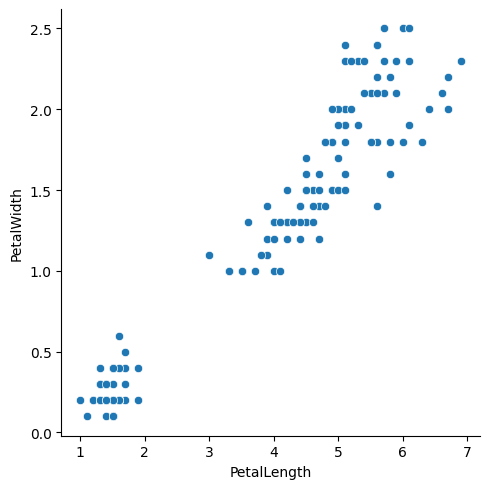

In [20]:
y= df["Species"]
X= df.iloc[:, 3:5]

import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False # Remove borda superior dos gráficos
plt.rcParams['axes.spines.right'] = False # Remove borda direita dos gráficos

import seaborn as sns
sns.relplot(x= X["PetalLength"], y= X["PetalWidth"]);

Agrupando o conjunto usando o parâmetro 2 para numero de cluster:

In [21]:
from sklearn.cluster import KMeans
Kmeans2= KMeans(n_clusters= 2, random_state= 0, n_init= 'auto').fit(X)

Kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Visualização do conjunto agrupado em 2:

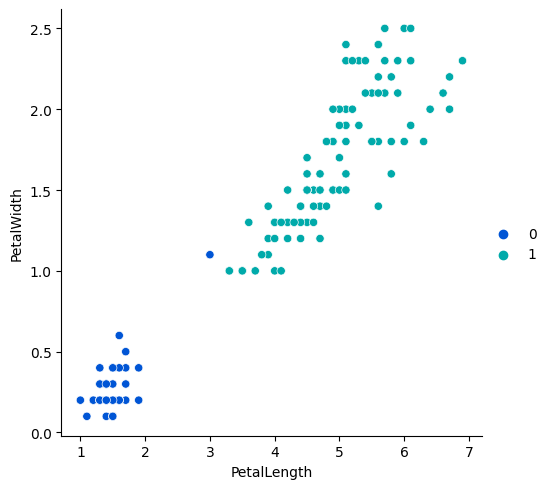

In [22]:
sns.relplot(x= X["PetalLength"], y= X["PetalWidth"], hue= Kmeans2.labels_, palette= "winter");

Percorrendo diferentes valores de K:

In [23]:
values_k= []
inertias= []

for i in range(1, 15):
  Kmeans= KMeans(n_clusters= i, random_state= 0, n_init= 'auto').fit(X)
  values_k.append(i)
  inertias.append(Kmeans.inertia_)

Método do Cotovelo (Elbow Method):

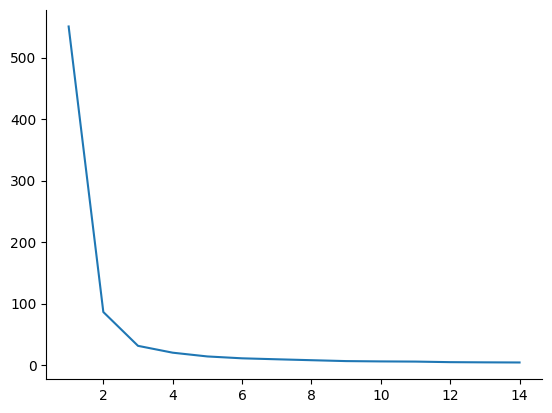

In [24]:
sns.lineplot(x= values_k, y= inertias);

Índice Rand Ajustado:<br><i>
(Mede semelhança de classes; valores negativos representam clusterizações piores que escolher de forma aleatória).

In [25]:
from sklearn import metrics
metrics.adjusted_rand_score(y, Kmeans2.labels_) # Avaliação do agrupamento usando K= 2 (n clusters)

0.5583714437541352

In [26]:
Kmeans3= KMeans(n_clusters= 3, random_state= 0, n_init= 'auto').fit(X)
metrics.adjusted_rand_score(y, Kmeans3.labels_)

0.8856970310281228

In [27]:
Kmeans4= KMeans(n_clusters= 4, random_state= 0, n_init= 'auto').fit(X)
metrics.adjusted_rand_score(y, Kmeans4.labels_)

0.7175532305353928

Estrutura de repetição para verificar melhor configuração para número de clusters:

In [28]:
values_k= []
ARI= [] # Ajusted Rand Index
RI= [] # Rand Index

for i in range(1, 15):
  Kmeans= KMeans(n_clusters= i, random_state= 0, n_init= 'auto').fit(X)
  values_k.append(i)
  RI.append(metrics.rand_score(y, Kmeans.labels_))
  ARI.append(metrics.adjusted_rand_score(y, Kmeans.labels_))

Avaliação gráfica para número de clusters:

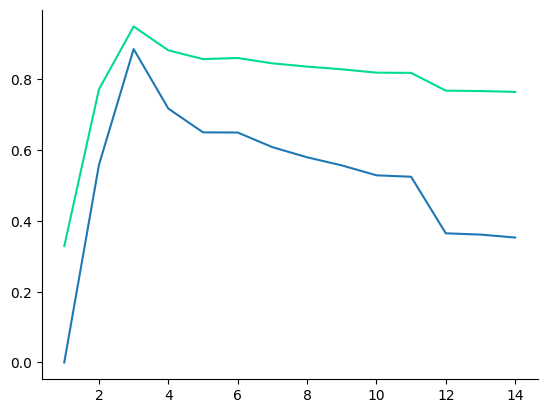

In [29]:
sns.lineplot(x= values_k, y= ARI)
sns.lineplot(x= values_k, y= RI, color= sns.color_palette("winter")[5]);

Utilizando o RI:<br>
(Não se esqueça que em comparação ao ARI, o RI tem alguns problemas, como valores altos mesmo para dados aleatórios).

In [30]:
Kmeans3= KMeans(n_clusters= 3, random_state= 0, n_init= 'auto').fit(X)
metrics.rand_score(y, Kmeans3.labels_)

0.9495302013422818

O Índice Rand é útil quando sabemos a classificação dos nossos itens.<br>
Em casos contrários podemos utilizar o Coeficiente Silhueta:

In [31]:
values_k= []# Inicio em K=2 para não gerar erro neste código
s= []
for i in range(2, 15):
  Kmeans= KMeans(n_clusters= i, random_state= 0, n_init= 'auto').fit(X)
  values_k.append(i)
  s.append(metrics.silhouette_score(X, Kmeans.labels_))

O valor mais alto nesse coeficiente indica o melhor numero de clusters:

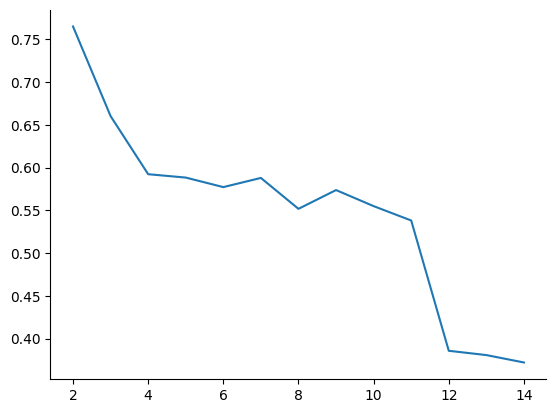

In [32]:
sns.lineplot(x= values_k, y= s);

Nesse caso o nosso melhor resultado foi obtido faazendo K= 2,<br>
então quer dizer que esse é o melhor valor de K?<br>
E a resposta é não, pois isso é apenas um direcionamento por onde você vai começar.<br><br>

Referencia:<br>
[hashtagtreinamentos](https://www.hashtagtreinamentos.com/category/ciencia-de-dados)